**Исследование рынка компьютерных игр за 1980-2016 годы**

Интернет-магазину «Стримчик», который продаёт по всему миру компьютерные игры, нужно спланировать рекламные компании на 2017 год и сделать ставку на потенциально популярные продукты.

Из открытых источников были получены исторические данные за период с 1980 по декабрь 2016 года о продажах игр, оценках пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

*Цель проекта* - выявление закономерностей, определяющих успешность игр. 

*Описание данных:*
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

*Этапы проекта:*
* Этап №1 - Изучим общую информацию из датасета
* Этап №2 - Подготовим данные к исследованию
* Этап №3 - Проведем исследовательский анализ данных
* Этап №4 - Составим портрет пользователя каждого региона
* Этап №5 - Проверим гипотезы
* Этап №6 - Сформируем выводы по результатам работы

**Шаг №1 - открытие файла и изучение первичных данных:**

In [1]:
# Сохраним данные из csv-файла в переменной data. Выведем на экран первые 10 строк датафрейма:
import pandas as pd
import os

pth1='/datasets/games.csv'
pth2='/Downloads/datasets/games.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Проверьте правильность пути к датасету')

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
# Выведем на экран общую информацию по датафрейму:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# Выведем на экран числовое описание значений столбцов датафрейма:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


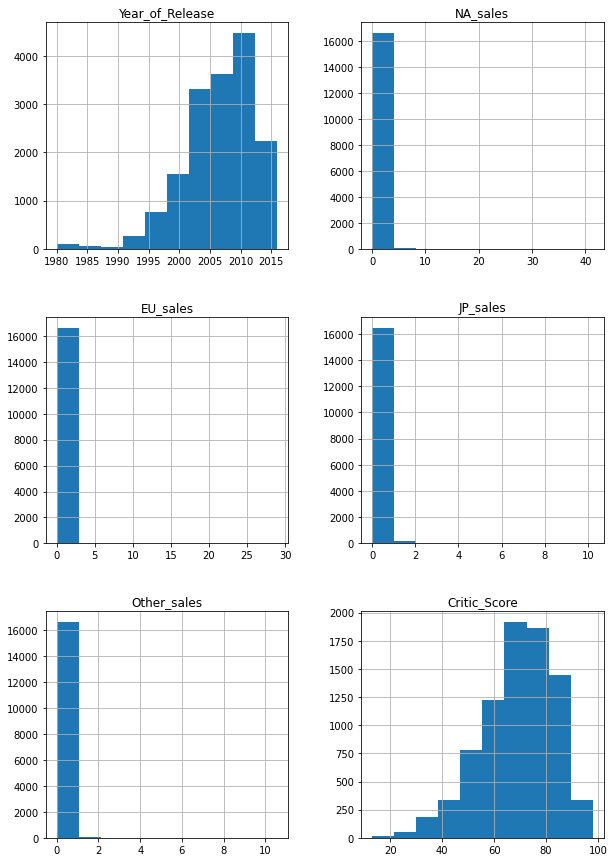

In [4]:
# Постороим гистограммы по каждому столбцу датафрейма:
import matplotlib.pyplot as plt

data.hist(figsize=(10,15))
plt.show()

**Шаг №2 - предобработка данных:**

In [5]:
# Приведем названия столбцов к нижнему регистру:
data = data.rename(columns=str.lower)

In [6]:
# Проверим датафрейм на наличие строк-дубликатов:
data.duplicated().sum()

0

**Коментарий:**

Нам нужно поменять тип данных в трех столбцах - *year_of_release*, *critic_score* и *user_score*.
Но для этого сначала нужно избавиться от пропусков. 

In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


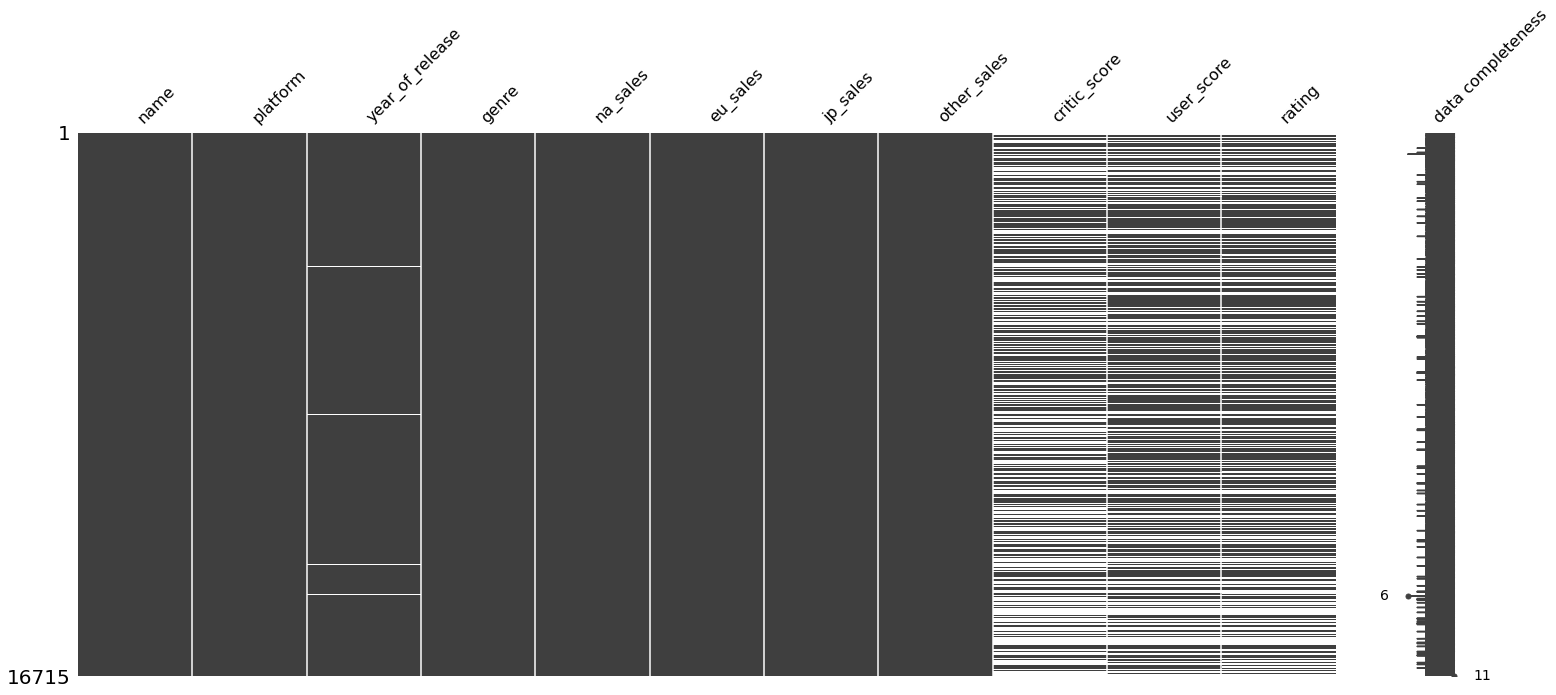

In [8]:
# Проверим количество пропусков в каждом столбце датафрейма:
print(data.isna().sum())

# Визуализируем количество пропусков по столбцам:
import missingno as msno
import numpy as ny
msno.matrix(data, labels=True)
plt.show()

**Комментарий:**

Визуализировав через гистограмму пропуски в каждом столбце, замечаем что все столбы кроме рейтинга, а также оценок критиков и пользователей заполнены практически на 100%. А вот с уже упомянутыми тремя столбцами придется поработать.

In [9]:
# Посмотрим на уникальные значения некоторых столбцов:
print('Платформы:', data['platform'].unique())
print()
print('Годы релиза:', data['year_of_release'].unique())
print()
print('Жанры:', data['genre'].unique())
print()
print('Рейтинги ESRB:', data['rating'].unique())

Платформы: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Годы релиза: [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

Жанры: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

Рейтинги ESRB: ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [10]:
# Определим количество игр с оценкой пользователей со значением tbd:
print('Количество игр с оценкой "нужно уточнить":', len(data.query('user_score == "tbd"')))

Количество игр с оценкой "нужно уточнить": 2424


**Комментарий:**

* В связи с тем, что пропусков в оценках критиков и пользователей весьма много (соответственно велико и влияние на весь датафрейм) было принято решение не удалять их, а заменить на значение равное 101. В дальнейшем будем просто ставить фильтр при работе с этими данными, исключая строки больше с оценкой больше 100. *Предположу, что пропущенные значения могли быть связаны отсутствием оценок у игры в общепринятых источниках. Причиной тому может быть масштаб/популярность игры (чем популярнее игра, тем охотнее на нее оставляют оценки).*

* Также следует отдельно отметить значение оценку пользователей "нужно уточнить" (=tbd). В данном случае такая оценка равносильна пропуску, но как и обычные пропуски, удалять строки из датафрейма не хочется, слишком уж много значений. Поэтому произведем замену на 102 и тоже будем ограничивать такие строки в дальнейшей работе.

* В столбце с рейтингом заменим все пропуски на *неопределено* = *undefined*. Определить настоящий рейтинг игр не представляется возможным, а так мы просто как-будто создадим новую категорию для игр с неопределенным рейтингом. *Предположу, что пропуски в этом столбце могут быть связаны с возрастом игр, т.к. большая часть игр без рейтинга - это старые игры и, возможно, в момент их выхода данного рейтинга просто не существовало.*

* Ну и все-таки стоит внести корректировки в отсутствующие значения столбца *year_of_release*. Заменим пропуски в данном столбце на 2023. И также не будем отсеивать их при рассмотрении данных в разрезе лет.

In [11]:
# Заменим пропуски в столбце *rating* на undefined:
data['rating'] = data['rating'].fillna('undefined')

# Удалим из DF строки с пропусками в столбцах *name* и *genre*, т.к. они никак не повлияют на ход исследования:
data = data.dropna(subset = ['name', 'genre'])

In [12]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating                0
dtype: int64

**Комментарий:**

После того, как пропуски были обработаны, можем приступить к изменению типов данных.

In [13]:
# Меняем типы данных в столбце с оценкой пользователей:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

**Был изменен тип данных в столбце user_score:**
оценка это всегда цисло. В случае исходной таблицы числа были записаны как object. В отличие от оценки критиков, шкала оценки ограничена максимальной оценкой равной 10 и может быть представлена в дробном виде. Приведем значения столбца к вещественному типу.

**Выведем на экран гистограммы с оценками критиков и пользователей:**

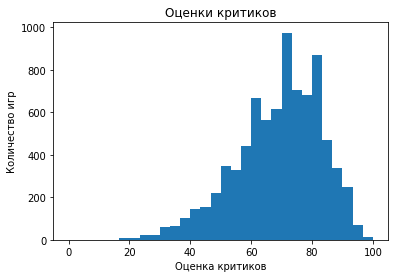

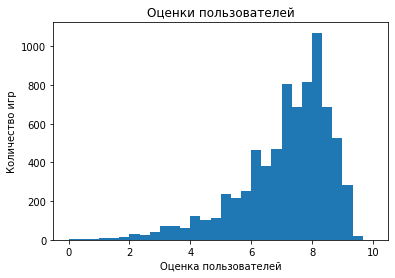

In [14]:
# Построим гистограмму по столбцу critic_score:
plt.hist(data['critic_score'], bins=30, range=(0, 100))
plt.title('Оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество игр')
plt.show()

# Построим гистограмму по столбцу user_score:
plt.hist(data['user_score'], bins=30, range=(0, 10))
plt.title('Оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество игр')
plt.show()

In [15]:
# Добавим столбец с общими продажами.
# Посчитаем суммарные продажи каждой игры по всем регионам:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [16]:
# Повторно посмотрим общую информацию по датафрейму после внесенных корректировок:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


**Шаг №3 - исследовательский анализ данных:**

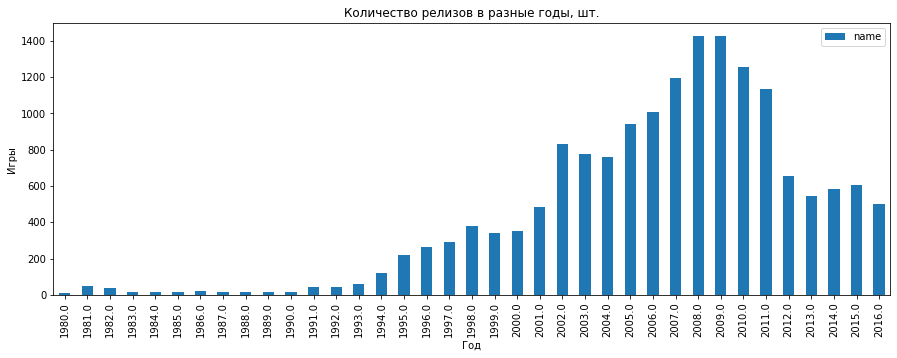

In [17]:
# Посмотрим объем выпускаемых игр по годам:
data.query('year_of_release < 2023').pivot_table(index='year_of_release', values='name',
            aggfunc='count').sort_values(by='year_of_release', ascending=True)\
            .plot(kind='bar', figsize=(15, 5), title='Количество релизов в разные годы, шт.', 
            xlabel='Год', ylabel='Игры')
plt.show()

**Из получившейся гистограммы можно сделать следующие выводы:**

* Вплоть до 2001 года производство компьютерных игр показывало стабильный (но очень медленный рост), вплоть до резкого скачка вверх в 2002 году ,после чего темпы ежегодного прироста были уже куда более стремительными.
* Пик выпуска компьютерных игр пришелся на период с 2008 по 2009 год. 
* В 2012 году произошел резки спад количества релизов. 
* В период с 2012 по 2016 год индустрия держится примерно на одном уровне с небольшим падением в 2016-м (что скорее всего связано с тем, что данные взяты не за весь год).

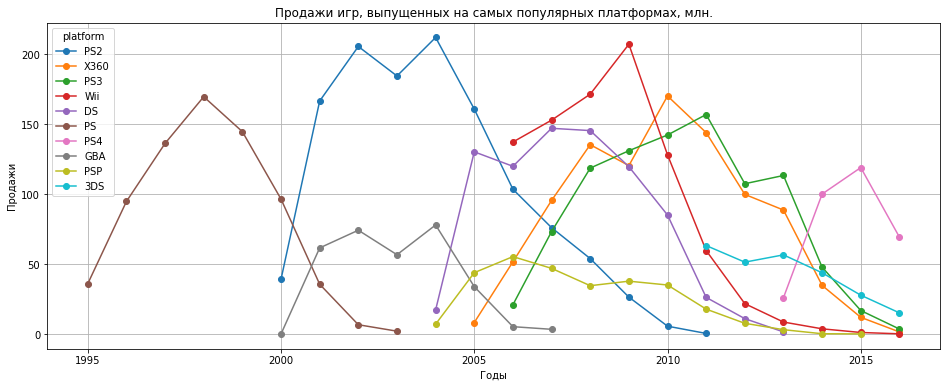

In [18]:
data.query('year_of_release > 1994 and year_of_release < 2023').pivot_table(index='platform', columns='year_of_release',
            values='total_sales', aggfunc='sum', margins=True).sort_values(by='All', ascending=False)\
            .drop(columns = 'All', axis=1).drop(index = 'All', axis=0).head(10).T.\
            plot(figsize=(16,6), style='o-', grid=True, title='Продажи игр, выпущенных на самых популярных платформах, млн.',
            xlabel='Годы', ylabel='Продажи')
plt.show()

**Комментарий:**

* На графике отображено 10 наиболее популярных (по продажам игр) платформ за период с 1994 по 2016 год.
* Выбор периода обусловлен результатами предыдущего задания, где отчетливо видно, что именно 1994 год - дал старт стабильному росту в индустрии производства игр.
* В среднем, продолжительность жизни игровой платформы составляет примерно 8-12 лет.
* Пиковые показатели продаж приходятся на значения в 4-6 лет.
* Спад в продажах у конкретной платформы зачастую связан именно с выхододом новых.

**Считаю, что в разрезе поставленной задачи, весь датафрейм нам не пригодится и нужно будет ограничиться только последними годами (а именно 2015-2016 годы), которые наиболее точно отражают актуальные тенденции в развитии игровой индустрии.**

In [19]:
# Определим лидеров по продажам игр среди платформ в 2015-2016 годах:
trend = data.query('2014 < year_of_release < 2023').pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
trend = trend.fillna(0)
trend['all'] = trend[2016] + trend[2015]
trend['change'] = round((trend[2016]/trend[2015])*100-100, 2)
trend.sort_values(by='all', ascending=False)

year_of_release,2015.0,2016.0,all,change
platform,,,,
PS4,118.90,69.25,188.15,-41.76
XOne,60.14,26.15,86.29,-56.52
3DS,27.78,15.14,42.92,-45.50
WiiU,16.35,4.60,20.95,-71.87
PS3,16.82,3.60,20.42,-78.60
PC,8.52,5.25,13.77,-38.38
X360,11.96,1.52,13.48,-87.29
PSV,6.25,4.25,10.50,-32.00
Wii,1.14,0.18,1.32,-84.21


In [20]:
# Определим лидеров по релизам игр среди платформ в 2015-2016 годах:
trend_games = data.query('2014 < year_of_release < 2023').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count')
trend_games = trend_games.fillna(0)
trend_games['all'] = trend_games[2016] + trend_games[2015]
trend_games['change'] = round((trend_games[2016]/trend_games[2015])*100-100, 2)
trend_games.sort_values(by='all', ascending=False)

year_of_release,2015.0,2016.0,all,change
platform,,,,
PS4,137.0,164.0,301.0,19.71
PSV,110.0,85.0,195.0,-22.73
XOne,80.0,87.0,167.0,8.75
3DS,86.0,46.0,132.0,-46.51
PS3,73.0,38.0,111.0,-47.95
PC,50.0,54.0,104.0,8.00
X360,35.0,13.0,48.0,-62.86
WiiU,28.0,14.0,42.0,-50.00
Wii,4.0,1.0,5.0,-75.00


**Комментарии:**
    
* Исходя из полученных результатов по продажам можно выдели ярко враженного лидера рынка - PS4. Несмотря на промежуточное падение продаж в еще не законченном 2016 году (41%, но может немного уменьшиться), данная платформа более чем в 2 раза опережает своего ближайшего конкурента Xbox One (-56% к предыдущему году). В целом, падение продаж - общий тренд 2016 года, среди всех платформ.

* Что касается релизов игр за аналогичный период, то и тут PS4 далеко впереди всех конкурентов, да еще и с приростом практически в 20%. Стоит отметить, что по данному показателю прирост показали: Xbox One (8,75%) и PC (8%). Также стоит отметить, что несмотря на общее количество игр изданных на PS Vita (195 - второй показатель среди всех), видна отрицательная динамика (-22,73%).

*Подитожим - среди всех, к потенциально наиболее прибыльным платформам можно отнести PS4 и Xbox One. Но, несмотря ни на что, третьей платформой поставил бы в этот рейтинг PC. Объясню: во-первых, по темпу падения продаж она показала третий результат (-38%, третий результат среди всех), а по выпуску игр и вовсе продемонстрировала рост на 8% (также третий показатель).*

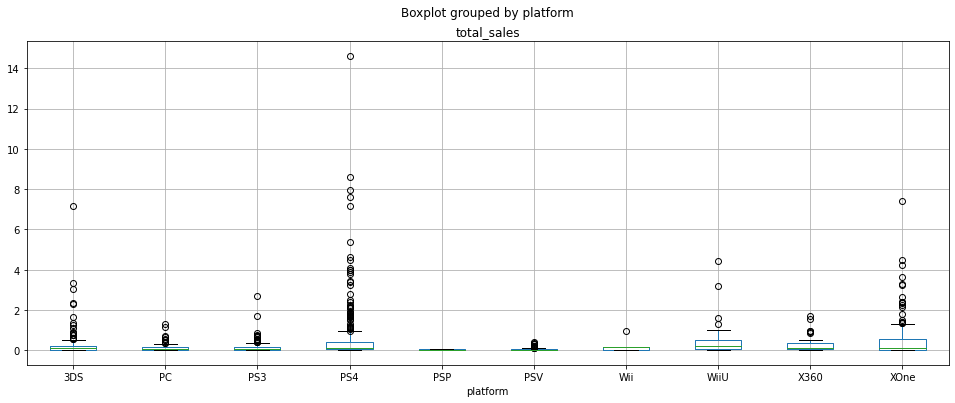

In [21]:
# Построим диаграмму размаха по всем продажам в 2015-2016 годах в разрезе платформ:
total_sales_actual = data.query('2014 < year_of_release < 2023')
total_sales_actual.boxplot('total_sales', by='platform', figsize=(16, 6))
plt.show()

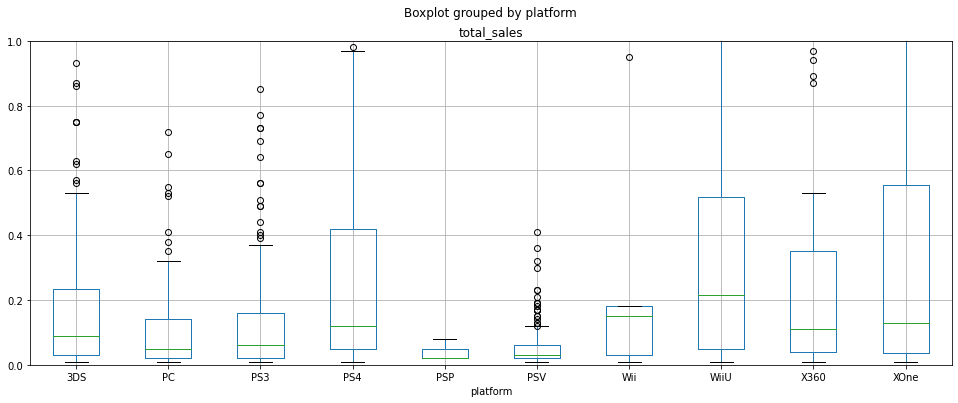

In [22]:
# На предыдущем графике явно видны выбросы, изменим масштаб, чтобы лучше увидеть среднее и медиану:
total_sales_actual = data.query('2014 < year_of_release < 2023')
total_sales_actual.boxplot('total_sales', by='platform', figsize=(16, 6))
plt.ylim(0, 1,5)
plt.show()

**Комментарии:**

Наибольшее число выбросов наблюдается у таких платформ, как PS4 и XboxOne. Их мы и выбрали на предыдущем этапе, как наиболее перспективные.

В то же время, высший показатель медианы у WiiU. Игры, ыпускаемы для этой платформы имеют стабильно высокие продажи, но отстутствие выбросов толкает к предположению, что у данной платформы уже сформировавшаяся пользовательсская база, которая скорее будет иметь тенденцию к уменьшению.

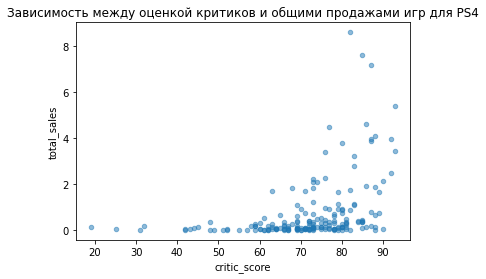

Коэффициент корреляции между оценкой критиков и общим объемом продаж игр для PS4: 0.3928485555130601


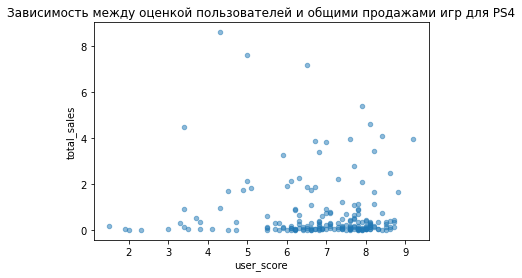

Коэффициент корреляции между оценкой пользователей и общим объемом продаж игр для PS4: -0.05973845712638215


In [23]:
# Создадим переменную, включающую только игры, релиз которых датирован 2015-2016 годами:
actual_data = data.query('2014 < year_of_release < 2023')

# Построим диаграмму рассеяния зависимости общих продаж игр для PS4 от оценки критиков:
actual_data_ps4_critic = actual_data.query('platform == "PS4" and critic_score <= 100')
actual_data_ps4_critic.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('Зависимость между оценкой критиков и общими продажами игр для PS4')
plt.show()
print('Коэффициент корреляции между оценкой критиков и общим объемом продаж игр для PS4:', actual_data_ps4_critic['total_sales'].corr(actual_data_ps4_critic['critic_score']))

# Построим диаграмму рассеяния зависимости общих продаж игр для PS4 от оценки пользователей:
actual_data_ps4_user = actual_data.query('platform == "PS4" and user_score <= 100')
actual_data_ps4_user.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('Зависимость между оценкой пользователей и общими продажами игр для PS4')
plt.show()
print('Коэффициент корреляции между оценкой пользователей и общим объемом продаж игр для PS4:', actual_data_ps4_user['total_sales'].corr(actual_data_ps4_user['user_score']))

**Комментарии:**

Внимательно изучив графики зависимости объема продаж игр для PS4 от оценки критиков и пользователей, становится очевидно, что если оценка критиков (коэф. корреляции 0,39) имеет умеренное влияние на покупательский спрос, в то время как оценка пользователей никак не влияет на продажи (-0,05).

**Изучим аналогичным образом ближайших конкурентов PS4 - XboxOne и PC**

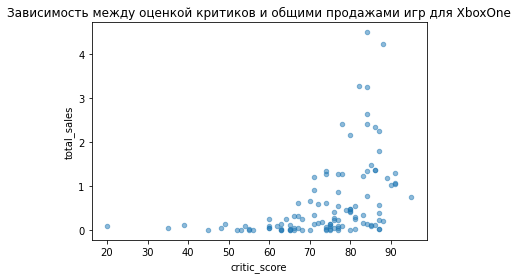

Коэффициент корреляции между оценкой критиков и общим объемом продаж игр для XboxOne: 0.430888745821368


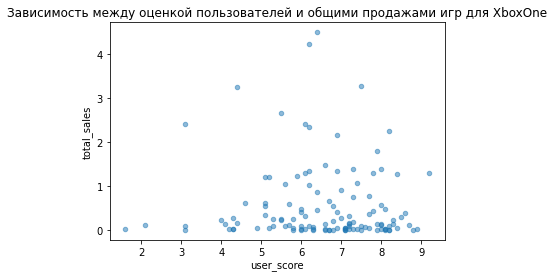

Коэффициент корреляции между оценкой пользователей и общим объемом продаж игр для XboxOne: -0.04146733387366271


In [24]:
# Построим диаграмму рассеяния зависимости общих продаж игр для XboxOne от оценки критиков:
actual_data_xbox_critic = actual_data.query('platform == "XOne" and critic_score <= 100')
actual_data_xbox_critic.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('Зависимость между оценкой критиков и общими продажами игр для XboxOne')
plt.show()
print('Коэффициент корреляции между оценкой критиков и общим объемом продаж игр для XboxOne:', actual_data_xbox_critic['total_sales'].corr(actual_data_xbox_critic['critic_score']))

# Построим диаграмму рассеяния зависимости общих продаж игр для XboxOne от оценки пользователей:
actual_data_xbox_user = actual_data.query('platform == "XOne" and user_score <= 100')
actual_data_xbox_user.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('Зависимость между оценкой пользователей и общими продажами игр для XboxOne')
plt.show()
print('Коэффициент корреляции между оценкой пользователей и общим объемом продаж игр для XboxOne:', actual_data_xbox_user['total_sales'].corr(actual_data_xbox_user['user_score']))

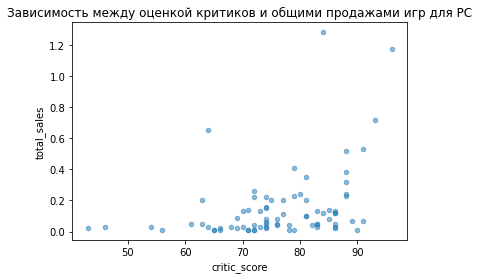

Коэффициент корреляции между оценкой критиков и общим объемом продаж игр для PC: 0.3773317477241351


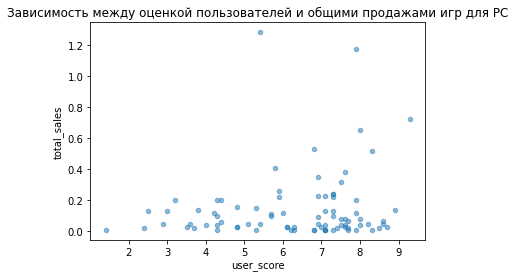

Коэффициент корреляции между оценкой пользователей и общим объемом продаж игр для PC: 0.15038053045029076


In [25]:
# Построим диаграмму рассеяния зависимости общих продаж игр для PC от оценки критиков:
actual_data_pc_critic = actual_data.query('platform == "PC" and critic_score <= 100')
actual_data_pc_critic.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('Зависимость между оценкой критиков и общими продажами игр для PC')
plt.show()
print('Коэффициент корреляции между оценкой критиков и общим объемом продаж игр для PC:', actual_data_pc_critic['total_sales'].corr(actual_data_pc_critic['critic_score']))

# Построим диаграмму рассеяния зависимости общих продаж игр для PC от оценки пользователей:
actual_data_pc_user = actual_data.query('platform == "PC" and user_score <= 100')
actual_data_pc_user.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('Зависимость между оценкой пользователей и общими продажами игр для PC')
plt.show()
print('Коэффициент корреляции между оценкой пользователей и общим объемом продаж игр для PC:', actual_data_pc_user['total_sales'].corr(actual_data_pc_user['user_score']))

**Комментарий:**

Изучив помимо PS4, аналогичные данные для XboxOne и PC, в целом видна тенденция, что небольшое влияние на продажи имеет только оценка критиков. Не повторюсь, влияение это весьма умеренное. Оценки пользователей во всех трех случаях очень приближены к нулю (немного выделяется PC с его 0,15 - но это тоже очень и очень мало, чтобы говорить о каком-то сколь существенном влиянии.

In [26]:
# Создадим переменную с распределением выпущенных в 2015-2016 годах игр по жанрам:
actual_genre = actual_data.pivot_table(index='genre', values='total_sales', aggfunc=('count', 'sum')) \
.sort_values(by='sum', ascending=False)

actual_genre

,count,sum
genre,,
Shooter,81,105.73
Action,431,102.13
Sports,107,64.33
Role-Playing,132,55.82
Misc,71,14.17
Fighting,37,12.37
Adventure,110,11.98
Racing,42,10.86
Platform,28,9.28


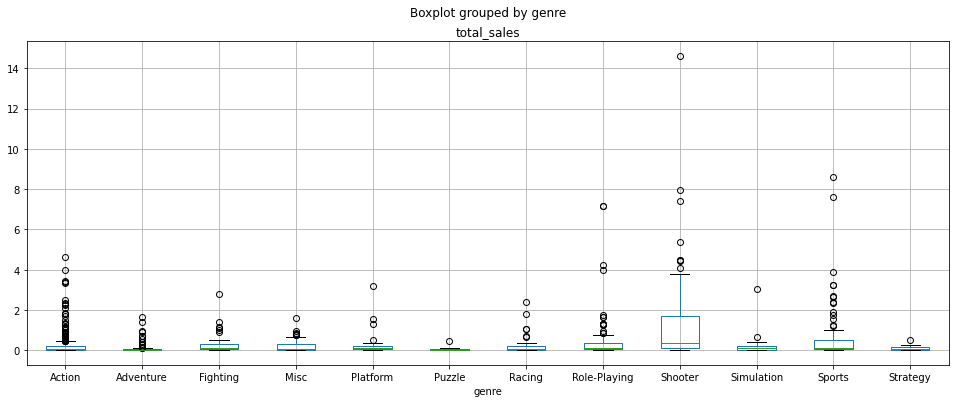

<function matplotlib.pyplot.show(close=None, block=None)>

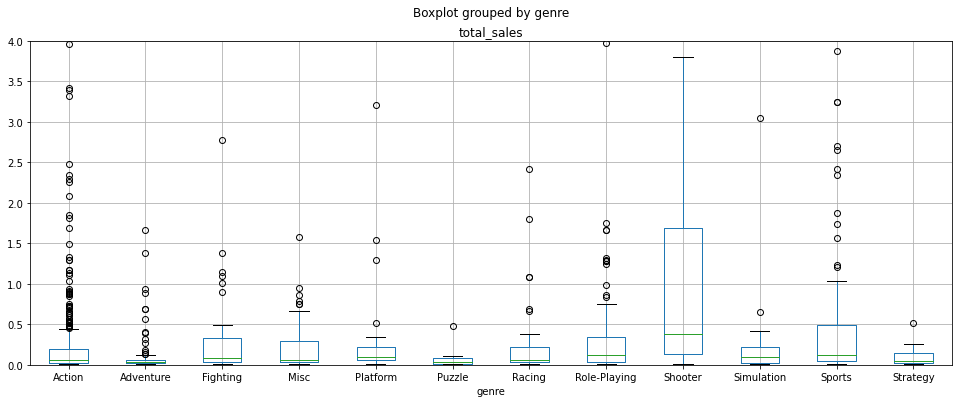

In [27]:
# Построим диаграмму размаха по всем продажам в 2015-2016 годах в разрезе жанров:
actual_data.boxplot('total_sales', by='genre', figsize=(16, 6))
plt.show()

# и увеличим его для наглядности по квартилям и медиане:
actual_data.boxplot('total_sales', by='genre', figsize=(16, 6))
plt.ylim(0, 4)
plt.show

<AxesSubplot:ylabel='count'>

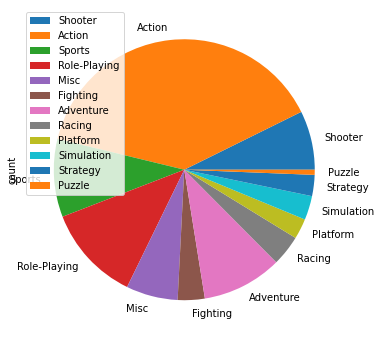

In [28]:
# Визуализируем распределение выпущенных в 2015-2016 годах игр по жанрам с помощью круговой диаграммы:
actual_genre.plot(y='count', kind='pie', figsize = (10,6))

**Комментарий:**

*По продажам:*
* Среди всех жанров, по продажам, есть явный аутсадер - пазлы (7 игр и 0,72 млн. продаж). Также в пару к ним можно отнести стратегии (2,97 мл. проданных копий).
* С другой стороны, по продажам сильно выделяются шутеры и экшен (105,7 и 102,1 млн. продаж, соответственно).
* Жанры второй очереди - спортивные симуляторы и ролевые игры (64,3 и 55,8).

*По бьъему выпущенных игр:*
* Также, как и по продажам, в самом низу - пазлы. Похоже их век заканчивается. Впрочем как и стратегии, которые имеют чуть более хорошие показатели, однако все равно уступают конкурентам.
* Круговая диаграмма лишь утвердила показатели продаж. В топе - экшен, спорт, шутеры и РПГ. Однако шутеры имеют куда больше выбросов, при меньшем количестве игр, благодаря чему важность таких продуктов в товарном портфеле магазина - крайне высока. ПОдводя итог, отдал бы приоритет именно этому жанру. А сразу после - оставшиеся три.


**Шаг №4 - составим портреты пользователей по регионам**

<function matplotlib.pyplot.show(close=None, block=None)>

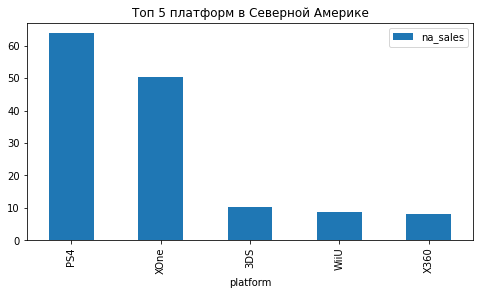

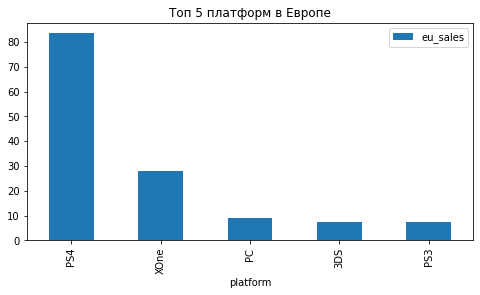

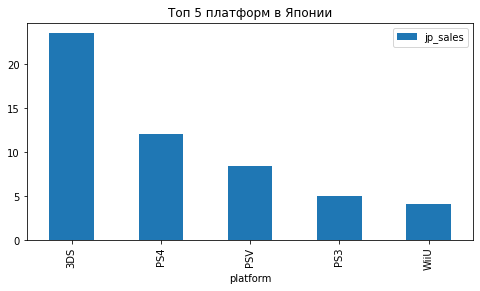

In [29]:
# Определим наиболее популярные платформы в Северной Америке:
actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum') \
.sort_values(by='na_sales', ascending=False).head().plot(y='na_sales', kind='bar', figsize = (8,4), title='Топ 5 платформ в Северной Америке')
plt.show

# Определим наиболее популярные платформы в Европе:
actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum') \
.sort_values(by='eu_sales', ascending=False).head().plot(y='eu_sales', kind='bar', figsize = (8,4), title='Топ 5 платформ в Европе')
plt.show

# Определим наиболее популярные платформы в Японии:
actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum') \
.sort_values(by='jp_sales', ascending=False).head().plot(y='jp_sales', kind='bar', figsize = (8,4), title='Топ 5 платформ в Японии')
plt.show

**Комментарии:**

* Пользователи из США выбирают платформы - PS4 и XboxOne. Данные консоли с завидным отрывом от ближайших конкурентов лидируют по продажам игр. Неудивительно, что Xbox максимально близко к PlayStation именно на этом рынке, ведь он принадлежит Microsoft.

* Европейцы, практически безальтернативно, предпочитают PS4. Ближайший конкурент также XboxOne, однако в этом регионе доля его продаж примерно в 2,5 раз ниже.

* Говоря о Японцах, то тут бросается в глаза, что местные пользователи выбирают продукт местного производителя. Нинтендо и все семейство Плейстешн занимает первые 4 места рейтинга продаж.

<function matplotlib.pyplot.show(close=None, block=None)>

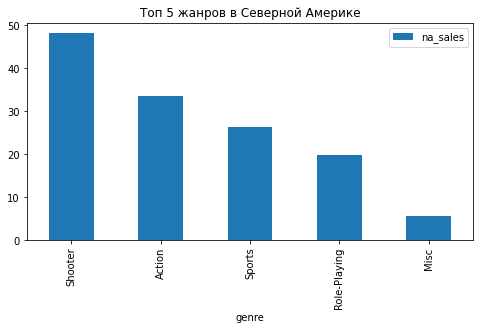

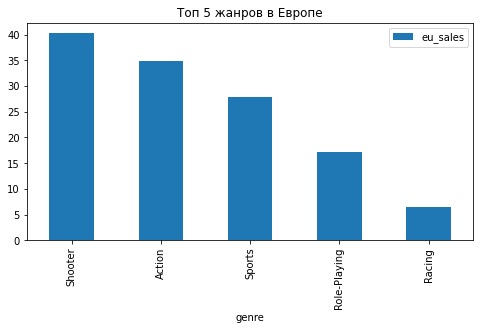

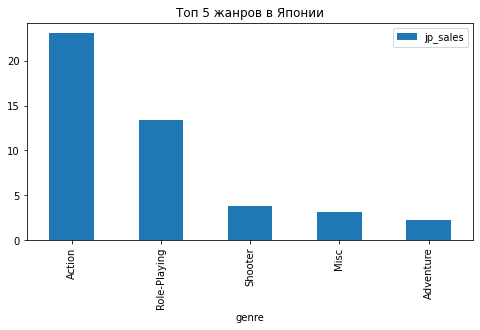

In [30]:
# Выведем топ-5 популярных жанров у североамериканских пользователей:
actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum') \
.sort_values(by='na_sales', ascending=False).head().plot(y='na_sales', kind='bar', figsize = (8,4), title='Топ 5 жанров в Северной Америке')
plt.show

# Выведем топ-5 популярных жанров у евопейских пользователей:
actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum') \
.sort_values(by='eu_sales', ascending=False).head().plot(y='eu_sales', kind='bar', figsize = (8,4), title='Топ 5 жанров в Европе')
plt.show

# Выведем топ-5 популярных жанров у японских пользователей:
actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum') \
.sort_values(by='jp_sales', ascending=False).head().plot(y='jp_sales', kind='bar', figsize = (8,4), title='Топ 5 жанров в Японии')
plt.show

**Комментарии:**

* Вкусовые предпочтения европейцев и североамериканцев практически идентичные. Топ-4 выглядит следующим образом: шутеры, экшен, спортивные симуляторы и РПГ. И все-таки немного больше симапатий данные рынки отдают именно шутерам. Причем в америке разница между ними и ближайшим преследователем (экшенами) более ярко выражена. 

* Чего не скажешь о Японцах. Глядя на диаграмму региона, невооруженным взглядом видно, что им больше по душе экшен и ролевые игры. Остальные категории не особо приглянулись островитянам.


<function matplotlib.pyplot.show(close=None, block=None)>

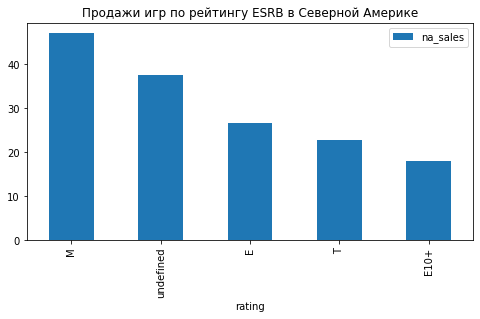

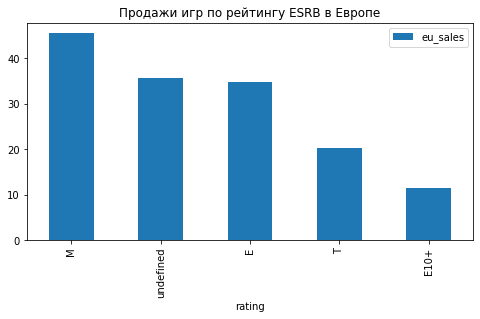

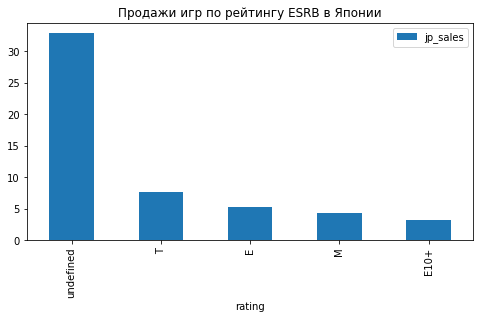

In [31]:
# Расчитаем влияние рейтинга ESRB на продажи игр в Северной Америке:
actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum') \
.sort_values(by='na_sales', ascending=False).plot(y='na_sales', kind='bar', figsize=(8, 4), title='Продажи игр по рейтингу ESRB в Северной Америке')
plt.show

# Расчитаем влияние рейтинга ESRB на продажи игр в Европе:
actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum') \
.sort_values(by='eu_sales', ascending=False).plot(y='eu_sales', kind='bar', figsize=(8, 4), title='Продажи игр по рейтингу ESRB в Европе')
plt.show

# Расчитаем влияние рейтинга ESRB на продажи игр в Японии:
actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum') \
.sort_values(by='jp_sales', ascending=False).plot(y='jp_sales', kind='bar', figsize=(8, 4), title='Продажи игр по рейтингу ESRB в Японии')
plt.show

**Комментарии:**

Изучив эти 3 графика, констатируем следующее: в Европе и Северной Америке, пользователи более ориентированны на взрослые игры, а в Японии на игры для детей и подростков.


**Шаг №5 - Проверяем гипотезы**

Для проверки гипотез будем использовать актуальную выборку, включающую информацию за 2015 и 2016 год.

**Гипотеза №1** - *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

* H_0: Средние пользовательские рейтинги на платформах Xbox One и PC равны
* H_1: Средние пользовательские рейтинги на платформах Xbox One и PC отличаются

In [32]:
from scipy import stats as st

In [33]:
xone = actual_data.query('platform == "XOne" and user_score < 100')['user_score']
pc = actual_data.query('platform == "PC" and user_score < 100')['user_score']

# посчитаем количество строк в переменных:
print(len(xone))
print(len(pc))

alpha = .05

results = st.ttest_ind(xone, pc)
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


121
84
0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


**Комментарий -** Исследование показало, что пользовательские рейтинги на платформах Xbox One и PC очень похожи. Нулевая гипотеза не отвергнута.

**Гипотеза №2** - *Средние пользовательские рейтинги жанров Action и Sports разные*

* H_0: Средние пользовательские рейтинги жанров Action и Sports равны
* H_1: Средние пользовательские рейтинги жанров Action и Sports отличаются

In [34]:
action = actual_data.query('genre == "Action" and user_score < 100')['user_score']
sports = actual_data.query('genre == "Sports" and user_score < 100')['user_score']

# посчитаем количество строк в переменных:
print(len(action))
print(len(sports))

alpha = .05
results = st.ttest_ind(action, sports)
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

193
82
1.0012846807938657e-13
Отвергаем нулевую гипотезу


**Комментарий** - нулевая гипотеза была отвергнута и как результат, подтверждено различие в польовательских рейтингах жанров Action и Sports

***Общие выводы по проекту:***

Было проведено исследование рынка компьютерных игр в период с 1980 по декабрь 2016 года 

**В ходе исследования были изучены изначальные данные, а также проведена их предварительная обработка, а именно:**
* Привели названия колонок к строчному виду,
* Заполнили пропуски в данных,
* Проверили датафрейм на наличие строк-дубликатов,
* Изменили типы данных в трех столбцах,
* Добавии новый столбец с общими продажами по всем регионам.

**Исследовали рынок компьютерных игр за весь доступный период. В результате чего выявили следующие закономерности:**
* Стремительное развитие индустрии началось в начале 90х годов и достигло своего пика в период 2008-2009. После чего произошел существенный спад и последующая стагнация, которая продолжалась как минмум до декабря 2016 года (граница нашего датафрейма) 
* Были изучены продажи по разным платформам в разрезе лет. В результате определен типичный жизненный цикл платформы: выход на пик в течение 4-6 лет с момента старта продаж при средней продолжительности жизни 12 лет.

**Для эффективного решения задачи проекта, ограничили датафрейм данными за период 2015-2016 года:**
* Были определены платформы-лидеры по объему продаж и количеству выпущенных для них игр. В результате было выявлено 3 наиболее перспективные на ближайший год платформы - PS4, XboxOne, PC.
* Построены диаграмы размаха по продажам игр на различных платформах. Изучение гистограм подтвердило предположение о перспективности 2х консолей - PS4, XboxOne.
* Изучена зависимость продаж от оценок критиков и пользователей на примере 3-х ранее упомянутых платформ. Результаты исследования по каждой платформе были практически идентичны. Выявлено незначительное влияние оценки критиков, при том, что влияние оценок пользователей фактически сводится к нулю.
* Определили, что наиболее популярными жанрами являются шутеры и экшен. В то время как яным аутсайдером оказался жанр пазлов.
* Определили закономерности пользовательских предпочтений по разным регионам (Северная Америка, Европа, Япония). Европейцы и американцы предпочитают играть во взрослые (шутеры) игры на платформах PS4 и XboxOne, а азиаты - в подростковые игры (предпочтительно экшены) на Нинтендо и всей линейке Playstation.
* Выявлено, что пользовательские рейтинги игр на ПК и Xbox за 2015-2016гг. мало отличаются друг от друга